<a href="https://colab.research.google.com/github/listakurniawati/Mathematical-Modelling-for-Chronic-Kidney-Disease-Detection-using-Multi-layer-Perceptron/blob/main/Feature_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
 
dt = pd.read_csv('https://raw.githubusercontent.com/Syamsyuriani/CKD/main/DatasetPGK(Processed).csv')

In [ ]:
import pandas as pd
import numpy as np
import itertools
import time
import statsmodels.api as sm
import matplotlib.pyplot as plt
from math import exp

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Inisialisasi variabel
Y = dt.classification
X = dt.drop(columns = ['classification'], axis = 1)

In [ ]:
def processSubset(feature_set):
    model = sm.OLS(Y,X[list(feature_set)])
    regr = model.fit()
    RSS = ((regr.predict(X[list(feature_set)]) - Y) ** 2).sum()
    MSE = RSS / (X.shape[0]-2)
    Cp = (1/X.shape[0]) * (RSS + 2 * len(feature_set) * MSE)
    return {"model":regr, "Cp":Cp}

## **Running Time**

In [ ]:
def backward(predictors):
    
    t_a = time.time()
    
    hasil = []
    
    for col in itertools.combinations(predictors, len(predictors)-1):
        hasil.append(processSubset(col))
    
    models = pd.DataFrame(hasil)
    
    # Pilih model dengan nilai Cp paling kecil
    best_model = models.loc[models['Cp'].argmin()]
    
    t_b = time.time()
    print("Memproses ", models.shape[0], "model dengan", len(predictors)-1, "predictors dalam", (t_b-t_a), "detik.")
    return best_model

In [ ]:
model_bwd = pd.DataFrame(columns=["Cp", "model"], index = range(1,len(X.columns)))

t_a = time.time()
predictors = X.columns

while(len(predictors) > 1):  
    model_bwd.loc[len(predictors)-1] = backward(predictors)[0]
    predictors = model_bwd.loc[len(predictors)-1]["model"].model.exog_names
    
t_b = time.time()
print("\nTotal waktu yang dibutuhkan:", (t_b-t_a), "detik.")

Memproses  23 model dengan 22 predictors dalam 0.1411283016204834 detik.
Memproses  22 model dengan 21 predictors dalam 0.16297388076782227 detik.
Memproses  21 model dengan 20 predictors dalam 0.19341564178466797 detik.
Memproses  20 model dengan 19 predictors dalam 0.1484537124633789 detik.
Memproses  19 model dengan 18 predictors dalam 0.1336352825164795 detik.
Memproses  18 model dengan 17 predictors dalam 0.11099648475646973 detik.
Memproses  17 model dengan 16 predictors dalam 0.13844537734985352 detik.
Memproses  16 model dengan 15 predictors dalam 0.07178640365600586 detik.
Memproses  15 model dengan 14 predictors dalam 0.07435369491577148 detik.
Memproses  14 model dengan 13 predictors dalam 0.056600093841552734 detik.
Memproses  13 model dengan 12 predictors dalam 0.07814979553222656 detik.
Memproses  12 model dengan 11 predictors dalam 0.06890368461608887 detik.
Memproses  11 model dengan 10 predictors dalam 0.08752250671386719 detik.
Memproses  10 model dengan 9 predictors 

## **Pemilihan Model**

In [ ]:
def backward(predictors):

    hasil = []
    
    for col in itertools.combinations(predictors, len(predictors)-1):
        hasil.append(processSubset(col))
    
    models = pd.DataFrame(hasil)
    
    # Pilih model dengan nilai Cp paling kecil
    best_model = models.loc[models['Cp'].argmin()]

    return best_model

In [ ]:
model_bwd = pd.DataFrame(columns=["Cp", "model"], index = range(1,len(X.columns)))
 
predictors = X.columns
while(len(predictors) > 1):  
    model_bwd.loc[len(predictors)-1] = backward(predictors)
    predictors = model_bwd.loc[len(predictors)-1]["model"].model.exog_names 
 
    print('\nModel yang dipilih dengan {} variabel:'.format(len(predictors)))
    print(pd.DataFrame({'variable': predictors, 'Koefisien': list(model_bwd.loc[len(predictors), "model"].params)}))


Model yang dipilih dengan 22 variabel:
   variable  Koefisien
0       age   0.000171
1        bp   0.003067
2        sg   1.951036
3        al   0.085737
4        su   0.011932
5        pc   0.005819
6       pcc   0.017594
7        ba  -0.021059
8       bgr   0.000559
9        bu  -0.001831
10       sc   0.013788
11      sod  -0.002537
12     hemo  -0.059880
13      pcv  -0.007417
14       wc  -0.000014
15       rc  -0.065519
16      htn   0.068313
17       dm   0.138530
18      cad  -0.110350
19    appet   0.057968
20       pe  -0.019676
21      ane  -0.121537

Model yang dipilih dengan 21 variabel:
   variable  Koefisien
0       age   0.000175
1        bp   0.003056
2        sg   1.957315
3        al   0.085519
4        su   0.012200
5       pcc   0.015122
6        ba  -0.022303
7       bgr   0.000553
8        bu  -0.001837
9        sc   0.013772
10      sod  -0.002543
11     hemo  -0.059842
12      pcv  -0.007403
13       wc  -0.000014
14       rc  -0.065428
15      htn   0.068355


## **Bandingkan RSS model yang telah dipilih**

In [ ]:
fitur23 = ['age', 'bp', 'sg', 'al', 'su', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc',
       'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet',
       'pe', 'ane']

In [ ]:
pd.set_option('max_colwidth', None)
hasil = pd.DataFrame(columns=["Cp", "model"], index = range(1,len(X.columns)))
predictors = X.columns
model23 = backward(predictors)
fitur = []

while(len(predictors) > 1):
    hasil.loc[len(predictors)-1] = backward(predictors)
    predictors = hasil.loc[len(predictors)-1]["model"].model.exog_names
    fitur.append(predictors)
fitur.reverse()
fitur.append(fitur23)
RS = list(hasil['Cp'])
RS.append(model23['Cp'])
p = pd.DataFrame({'Cp': RS,'Fitur': fitur},index=range(1,24))
p

,Cp,Fitur
1,0.246226,[sg]
2,0.116292,"[sg, hemo]"
3,0.101896,"[sg, hemo, dm]"
4,0.093457,"[sg, al, hemo, dm]"
5,0.088823,"[sg, al, hemo, wc, dm]"
6,0.087138,"[bp, sg, al, hemo, wc, dm]"
7,0.085475,"[bp, sg, al, bu, hemo, wc, dm]"
8,0.084205,"[bp, sg, al, bu, hemo, wc, rc, dm]"
9,0.083170,"[bp, sg, al, bgr, bu, hemo, wc, rc, dm]"
10,0.082546,"[bp, sg, al, bgr, bu, sc, hemo, wc, rc, dm]"


In [ ]:
p.loc[p['Cp'].argmin() + 1]

Cp                                                             0.0817853
Fitur    [bp, sg, al, bgr, bu, sc, hemo, pcv, wc, rc, htn, dm, cad, ane]
Name: 14, dtype: object

In [ ]:
hasil.loc[14]['model'].params

bp      0.003161
sg      1.624725
al      0.086277
bgr     0.000690
bu     -0.001872
sc      0.014708
hemo   -0.060119
pcv    -0.007943
wc     -0.000014
rc     -0.066346
htn     0.071379
dm      0.154432
cad    -0.106983
ane    -0.108029
dtype: float64

# **Pemisahan Data**

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
X1 = dt.drop(columns=['age', 'su', 'pc', 'pcc', 'ba', 'sod', 'pot', 'appet', 'pe', 'classification'])
X1

,bp,sg,al,bgr,bu,sc,hemo,pcv,wc,rc,htn,dm,cad,ane
0,80,1.020,1,121,36.0,1.2,15.4,44.0,7800,5.200000,1,1,0,0
1,50,1.020,4,122,18.0,0.8,11.3,38.0,6000,4.232106,0,0,0,0
2,80,1.010,2,423,53.0,1.8,9.6,31.0,7500,3.773686,0,1,0,1
3,70,1.005,4,117,56.0,3.8,11.2,32.0,6700,3.900000,1,0,0,1
4,80,1.010,2,106,26.0,1.4,11.6,35.0,7300,4.600000,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,80,1.020,0,140,49.0,0.5,15.7,47.0,6700,4.900000,0,0,0,0
347,70,1.025,0,75,31.0,1.2,16.5,54.0,7800,6.200000,0,0,0,0
348,80,1.020,0,100,26.0,0.6,15.8,49.0,6600,5.400000,0,0,0,0
349,60,1.025,0,114,50.0,1.0,14.2,51.0,7200,5.900000,0,0,0,0


In [ ]:
scaler = StandardScaler()
scaler.fit(X_1)
X1 = scaler.transform(X1)

In [ ]:
y1= dt.iloc[:,-1]

def_encoder = LabelEncoder()
y1 = def_encoder.fit_transform(y)
y1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.2, random_state=1)

test

In [ ]:
from matplotlib.pyplot import figure
import seaborn as sns

In [ ]:
dt.isnull().sum()

age               0
bp                0
sg                0
al                0
su                0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [ ]:
dt.corr()

,age,bp,sg,al,su,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
age,1.000000,0.186486,-0.184847,0.114897,0.219935,-0.130323,0.187274,0.058627,0.259545,0.193712,0.151232,-0.099395,0.048334,-0.166079,-0.196004,0.042379,-0.194067,0.389090,0.327005,0.223610,0.160814,0.094610,0.034867,0.206188
bp,0.186486,1.000000,-0.192670,0.167157,0.217848,-0.184663,0.077988,0.131289,0.157360,0.165273,0.183965,-0.084936,0.065060,-0.246677,-0.273510,-0.026346,-0.195595,0.276918,0.214527,0.085286,0.196854,0.094482,0.186498,0.293792
sg,-0.184847,-0.192670,1.000000,-0.467575,-0.290673,0.357136,-0.297194,-0.224672,-0.347933,-0.306169,-0.349128,0.360473,-0.061097,0.583885,0.567066,0.058577,0.535157,-0.406445,-0.427902,-0.178876,-0.271442,-0.301401,-0.247128,-0.731760
al,0.114897,0.167157,-0.467575,1.000000,0.269305,-0.545905,0.407992,0.373215,0.346502,0.448526,0.393627,-0.411429,0.116642,-0.606521,-0.579269,0.024484,-0.523712,0.525447,0.408499,0.272723,0.360950,0.473842,0.326556,0.624864
su,0.219935,0.217848,-0.290673,0.269305,1.000000,-0.168823,0.152700,0.108124,0.734352,0.166178,0.219535,-0.109850,0.181302,-0.210024,-0.218344,0.030613,-0.206219,0.322959,0.524013,0.280445,0.087941,0.143550,0.075648,0.344070
pc,-0.130323,-0.184663,0.357136,-0.545905,-0.168823,1.000000,-0.530803,-0.349205,-0.297948,-0.431649,-0.353546,0.304133,-0.160396,0.505111,0.496639,-0.001294,0.460706,-0.363206,-0.279966,-0.221080,-0.337374,-0.409474,-0.336350,-0.441053
pcc,0.187274,0.077988,-0.297194,0.407992,0.152700,-0.530803,1.000000,0.266818,0.251029,0.227536,0.137322,-0.240621,-0.007830,-0.337201,-0.332395,0.065325,-0.318709,0.253234,0.222141,0.230900,0.219066,0.128465,0.226210,0.309311
ba,0.058627,0.131289,-0.224672,0.373215,0.108124,-0.349205,0.266818,1.000000,0.099389,0.190891,0.122847,-0.144841,-0.003194,-0.248485,-0.236817,0.055887,-0.214548,0.123710,0.115360,0.196150,0.170649,0.157620,0.076628,0.216952
bgr,0.259545,0.157360,-0.347933,0.346502,0.734352,-0.297948,0.251029,0.099389,1.000000,0.172153,0.149088,-0.224047,0.057607,-0.296639,-0.301411,0.033471,-0.277298,0.423325,0.569423,0.304046,0.240325,0.149096,0.134422,0.426039
bu,0.193712,0.165273,-0.306169,0.448526,0.166178,-0.431649,0.227536,0.190891,0.172153,1.000000,0.805072,-0.308818,0.368054,-0.535661,-0.531587,0.024804,-0.487593,0.374549,0.318948,0.230484,0.320866,0.389439,0.432862,0.358775


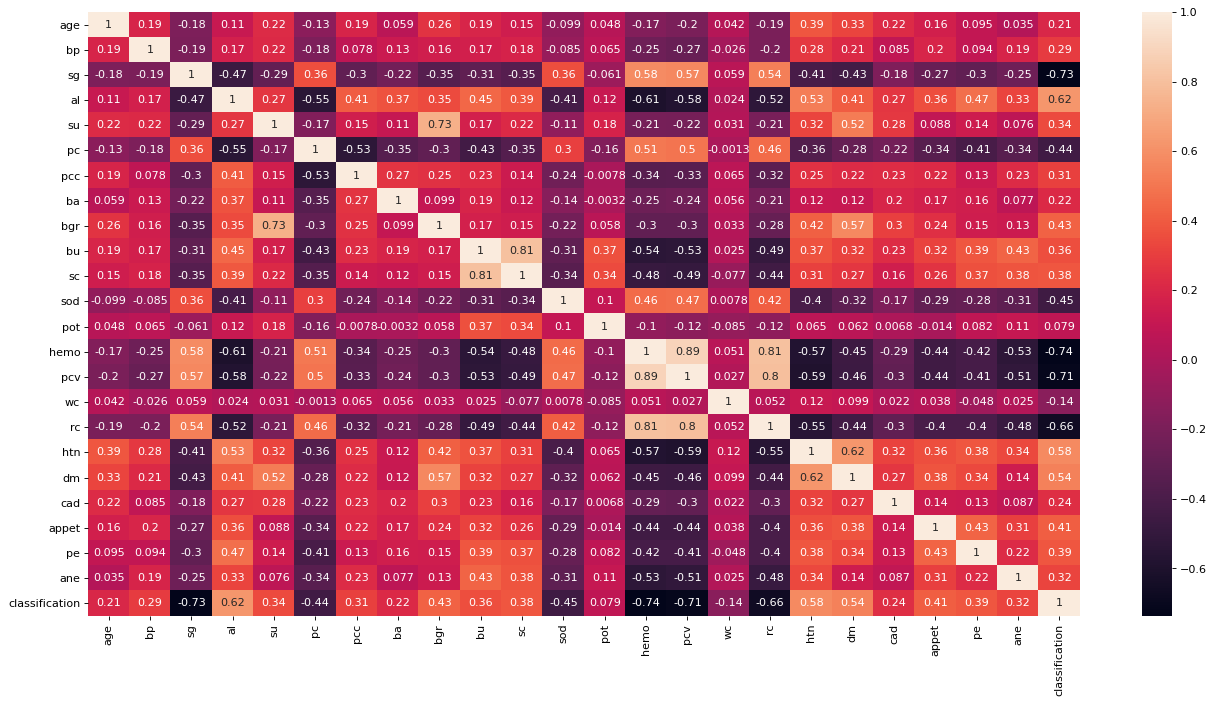

In [ ]:
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
sns.heatmap(dt.corr(),annot=True)

In [ ]:
X=dt.iloc[:, :-1]
X.head()

,age,bp,sg,al,su,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,48,80,1.020,1,0,1,0,0,121,36.0,1.2,138,4.6,15.4,44.0,7800,5.200000,1,1,0,0,0,0
1,7,50,1.020,4,0,1,0,0,122,18.0,0.8,138,4.6,11.3,38.0,6000,4.232106,0,0,0,0,0,0
2,62,80,1.010,2,3,1,0,0,423,53.0,1.8,138,4.6,9.6,31.0,7500,3.773686,0,1,0,1,0,1
3,48,70,1.005,4,0,0,1,0,117,56.0,3.8,111,2.5,11.2,32.0,6700,3.900000,1,0,0,1,1,1
4,51,80,1.010,2,0,1,0,0,106,26.0,1.4,138,4.6,11.6,35.0,7300,4.600000,0,0,0,0,0,0


In [ ]:
y=dt.iloc[:,-1]

def_encoder = LabelEncoder()
y = def_encoder.fit_transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
correlated_features = set()
correlation_matrix = dt.drop(columns = ['classification'], axis=1).corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [ ]:
list(correlated_features)

['rc', 'sc', 'pcv']

In [ ]:
X = X.drop(list(correlated_features),axis=1)
target = y

In [ ]:
X.head()

,age,bp,sg,al,su,pc,pcc,ba,bgr,bu,sod,pot,hemo,wc,htn,dm,cad,appet,pe,ane
0,48,80,1.020,1,0,1,0,0,121,36.0,138,4.6,15.4,7800,1,1,0,0,0,0
1,7,50,1.020,4,0,1,0,0,122,18.0,138,4.6,11.3,6000,0,0,0,0,0,0
2,62,80,1.010,2,3,1,0,0,423,53.0,138,4.6,9.6,7500,0,1,0,1,0,1
3,48,70,1.005,4,0,0,1,0,117,56.0,111,2.5,11.2,6700,1,0,0,1,1,1
4,51,80,1.010,2,0,1,0,0,106,26.0,138,4.6,11.6,7300,0,0,0,0,0,0
